In [1]:
from tqdm.notebook import tqdm
import pandas as pd
import os

In [2]:
structures = pd.read_csv("datasets/dichalcogenides_innopolis_202105/defects.csv", index_col=0)

In [3]:
import pymatgen.io.cif
STRUCTURES_FOLDER = "datasets/dichalcogenides_innopolis_202105/initial/"
initial_structures = dict()
for structure_file in tqdm(os.listdir(STRUCTURES_FOLDER)):
  this_file = pymatgen.io.cif.CifParser(os.path.join(STRUCTURES_FOLDER, structure_file))
  initial_structures[os.path.splitext(structure_file)[0]] = this_file.get_structures(primitive=False)[0]

  0%|          | 0/3480 [00:00<?, ?it/s]

/temporary/pymatgen/pymatgen/io/cif.py:1123: UserWarning:

Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.



In [4]:
structures["initial_structure"] = structures.apply(lambda row: initial_structures[row._id], axis=1)

In [5]:
n_atoms = structures.initial_structure.apply(len)
structures["energy_per_atom_from_total"] = structures["energy"]/n_atoms

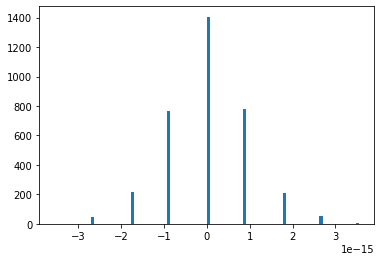

In [6]:
import matplotlib.pyplot as plt
plt.hist(structures["energy_per_atom_from_total"] - structures["energy_per_atom"], bins=100);

For a small number of structures, energy/n_atoms != energy_per_atom

In [7]:
defective = structures[(structures["energy_per_atom_from_total"] - structures["energy_per_atom"]) < -5]

In [8]:
defective.head()

,_id,descriptor_id,defect_id,energy,energy_per_atom,fermi_level,homo,lumo,initial_structure,energy_per_atom_from_total
